In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('fd01-sample1.csv')

# every file works, only the data distribution changes accordingly
# df = pd.read_csv('fd01-sample1.csv')
# df = pd.read_csv('fd01-sample2.csv')
# df = pd.read_csv('fd02-sample1.csv')
# df = pd.read_csv('fd02-sample2.csv')

# split into train and test dataset
x_train, x_test = train_test_split(df, test_size=0.2)
print(x_train.shape, x_test.shape)

(800, 30) (200, 30)


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

# data cleaning
x_train.drop(['Class'], axis=1)

# The following 2 scalers(MinMaxScaler and StandardScaler) both work with the same accuracy
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
# scaler = StandardScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
# x = preprocessing.normalize(x_train)
# xt = preprocessing.normalize(x_test)
x = x_train # decision tree does not need scaler
xt = x_test

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)
model.fit(x, x_train.Class)

DecisionTreeClassifier(max_depth=15)

1.0
[[102   0]
 [  0  98]]


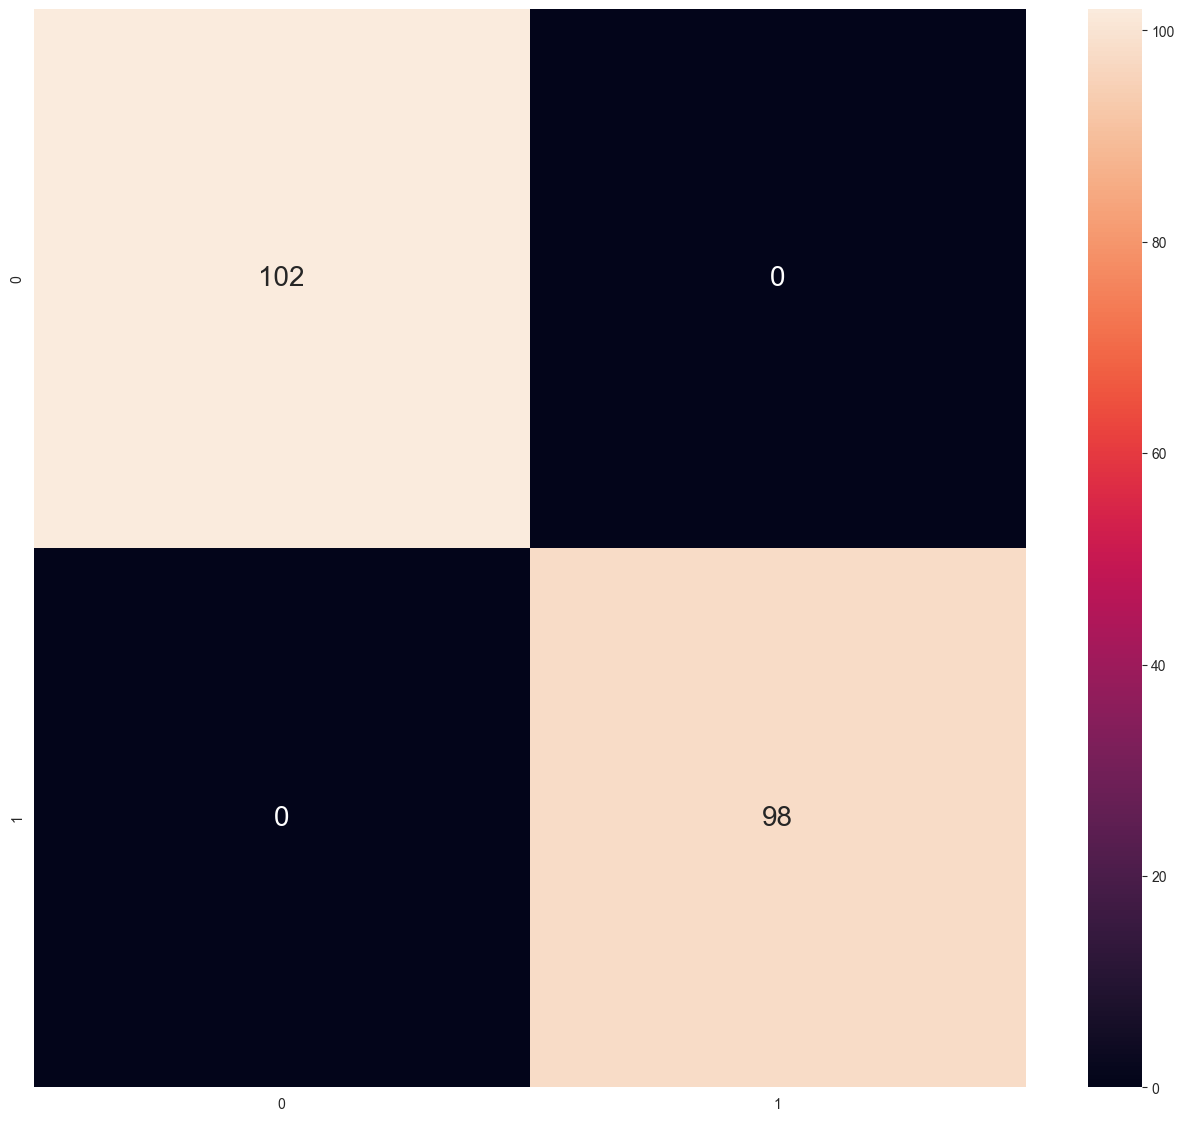

In [14]:
y = model.predict(xt)
score = model.score(xt, y)
print(score)

# import seaborn as sns
# sns.catplot(x=x[:, 0], y=model.labels_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm = confusion_matrix(x_test.iloc[:, 0], np.where(y > 0.5, 1, 0))
print(cm)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20})

plt.show()

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.labels_)
# disp.plot()
# plt.show()
